### PCA Project - Which Digits are Most Differentiated


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
digits = pd.read_csv('digits.csv')

### Data 
250 samples from 44 writers.
Samples from 30 writers used for training.
The tablet sends x and y tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 milliseconds.


In [12]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
# what are the rows and columns here? 
# 8x8 images of pixels (64) columns 
# last column is number_label
digits.shape

(1797, 65)

### Task: Create a new DataFrame called pixels that consists only of the pixel feature values by dropping the number_label column

In [15]:
digits_pixels = digits.drop(labels='number_label', axis=1)

In [17]:
# successfully dropped number_label
digits_pixels.shape

(1797, 64)

##### Task: Grab a single image row representation by getting hte final row of the pixels DataFrame

In [19]:
first_row = digits_pixels.iloc[0]

In [20]:
first_row

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

#### Task: convert this single row Series into a numpy array 

In [21]:
np_array = first_row.to_numpy()

In [22]:
np_array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

##### Task: reshape this numpy array into an (8,8) array 

In [23]:
two_d_array = np.reshape(np_array, (8,8))

In [24]:
two_d_array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Task: use matplotlib or seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.

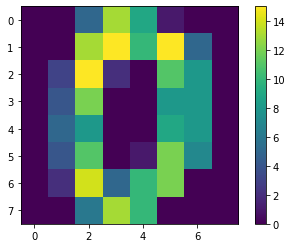

In [25]:
# note to self: should go back and watch the matplotlib section 
plt.imshow(two_d_array)
plt.colorbar()
plt.show()

### Scaling Data 
#### Task: Use Scikit-Learn to scale the pixel feature dataframe

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X = scaler.fit_transform(digits_pixels)

In [31]:
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### PCA 
#### Task: Perform PCA on the scaled pixel data set with 2 components

In [32]:
from sklearn.decomposition import PCA

In [33]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 

In [34]:
pca = PCA(n_components=2)

In [35]:
principal_components = pca.fit_transform(scaled_X)

#### Task: How much variance is explained by 2 principal components

In [36]:
# it's interesting that this data gets stored in the pca object 
# as opposed to the principal_components object
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [37]:
pca.explained_variance_ratio_.sum()

0.2159497049899753

In [38]:
principal_components

array([[ 1.91422162, -0.95448422],
       [ 0.58897882,  0.92463769],
       [ 1.30201973, -0.31720966],
       ...,
       [ 1.02259029, -0.14793444],
       [ 1.07605843, -0.38088954],
       [-1.2576962 , -2.22757904]])

#### Task: create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.

plt.scatter(principal_components[:,0],principal_components[:,1],c=cancer_dictionary['target'])

^ What is this line doing?

principal_components[:0] --> get the 

In [39]:


plt.scatter(principal_components)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'